# Tarea 4: procesamiento de texto challenge 

In [80]:
#limpieza de la base
import pandas as pd
import os 
import numpy as np 
import nltk 
from nltk.corpus import stopwords
from nltk import bigrams
from itertools import chain
import string
#representación del texto 
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx


Para este desafío utilizaremos una base de datos de la contraloria, la cual contiene los resultados de las acciones de supervisión que los monitores ciudadanos de control realizaron sobre ciertas obras durante el año 2021. Sobre la base de estos resultados se realizará un gráfico gramial. 

In [81]:
monitorestext= os.path.join("data", "monitores.txt")
monitores=pd.read_table(monitorestext, header=None)

In [82]:
monitores[0]=monitores[0].str.lower()

Eliminamos los signos de puntuación

In [83]:
puntos=string.punctuation
monitores[0]=monitores[0].str.replace('['+puntos+']','', regex=True)

Creando trigramas

In [84]:
from nltk.util import ngrams

In [85]:
trigramas=[ngrams(eachword.split(),3) for eachword in monitores[0]]
triplemonitor= list(chain(*trigramas))

triplemonitor

[('una', '1', 'camara'),
 ('1', 'camara', 'de'),
 ('camara', 'de', 'videovigilancia'),
 ('de', 'videovigilancia', 'de'),
 ('videovigilancia', 'de', 'la'),
 ('de', 'la', 'entidad'),
 ('la', 'entidad', 'no'),
 ('entidad', 'no', 'se'),
 ('no', 'se', 'encuentra'),
 ('se', 'encuentra', 'en'),
 ('encuentra', 'en', 'funcionamiento'),
 ('en', 'funcionamiento', 'situacion'),
 ('funcionamiento', 'situacion', 'que'),
 ('situacion', 'que', 'podria'),
 ('que', 'podria', 'afectar'),
 ('podria', 'afectar', 'el'),
 ('afectar', 'el', 'monitoreo'),
 ('el', 'monitoreo', 'permanente'),
 ('monitoreo', 'permanente', 'del'),
 ('permanente', 'del', 'sistema'),
 ('del', 'sistema', 'de'),
 ('sistema', 'de', 'seguridad'),
 ('de', 'seguridad', 'ciudadana'),
 ('seguridad', 'ciudadana', 'a'),
 ('ciudadana', 'a', 'cargo'),
 ('a', 'cargo', 'del'),
 ('cargo', 'del', 'gobierno'),
 ('del', 'gobierno', 'local'),
 ('una', '1', 'camara'),
 ('1', 'camara', 'de'),
 ('camara', 'de', 'videovigilancia'),
 ('de', 'videovigilanci

Eliminamos stewords

In [86]:
STOPS= stopwords.words("spanish")
triplemonitor_clean=[gram for gram in triplemonitor if not any (stop in gram for stop in STOPS)]

Creando tabla de frecuencias

In [87]:
triplemonitorcoun=Counter(triplemonitor_clean)
monitordf=pd.DataFrame(triplemonitorcoun.most_common(),
                        columns= ['Trigram', 'weight'])
monitordf

,Trigram,weight
0,"(plazo, minimo, establecido)",21
1,"(normativa, aplicable, situacion)",21
2,"(entidades, competentes, utilicen)",21
3,"(competentes, utilicen, oportunamente)",21
4,"(utilicen, oportunamente, dichas)",21
...,...,...
92,"(techos, podria, afectar)",1
93,"(calendario, valorizado, actualizado)",1
94,"(plazo, establecido, afectando)",1
95,"(permanente, control, tecnico)",1


Creandos dos nuevas columnas y aplicando la red

In [88]:
monitordf['word1'], monitordf['word2'], monitordf['word3']= zip(*monitordf['Trigram'])
monitor_x=nx.from_pandas_edgelist(df=monitordf, source='word1', target= 'word3', edge_attr= ['weight'])

Graficando

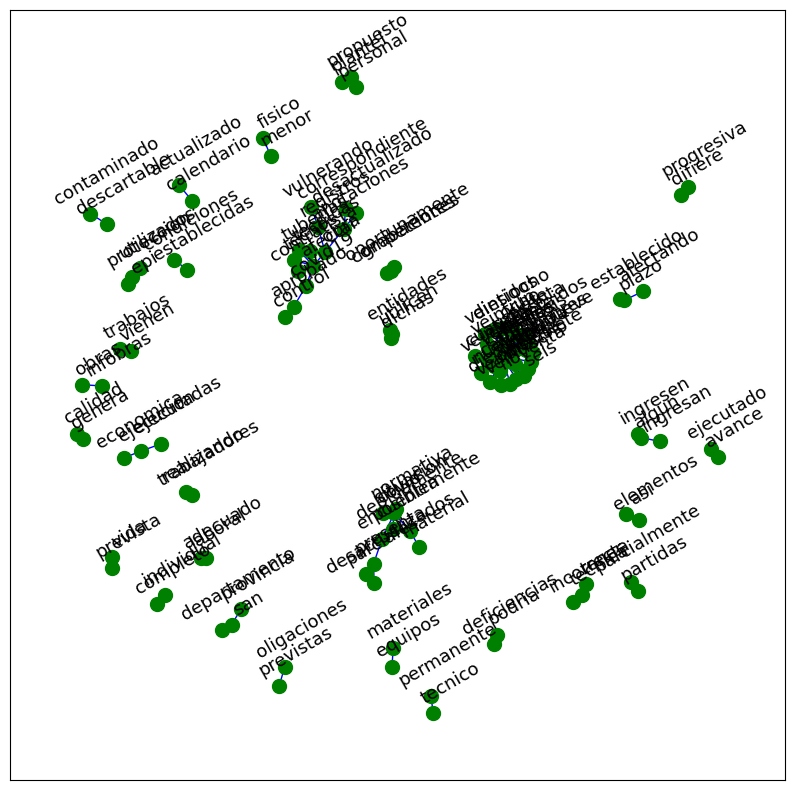

In [89]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(monitor_x)

# Plot networks
nx.draw_networkx(monitor_x, pos,
                 edge_color='blue',node_color='green',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center',
            fontsize=13,rotation=30)

plt.show()

Realizando tetragramas 

In [97]:
tetra=[ngrams(eachword.split(),4) for eachword in monitores[0]]
tetraxd= list(chain(*tetra))

tetraxd

[('una', '1', 'camara', 'de'),
 ('1', 'camara', 'de', 'videovigilancia'),
 ('camara', 'de', 'videovigilancia', 'de'),
 ('de', 'videovigilancia', 'de', 'la'),
 ('videovigilancia', 'de', 'la', 'entidad'),
 ('de', 'la', 'entidad', 'no'),
 ('la', 'entidad', 'no', 'se'),
 ('entidad', 'no', 'se', 'encuentra'),
 ('no', 'se', 'encuentra', 'en'),
 ('se', 'encuentra', 'en', 'funcionamiento'),
 ('encuentra', 'en', 'funcionamiento', 'situacion'),
 ('en', 'funcionamiento', 'situacion', 'que'),
 ('funcionamiento', 'situacion', 'que', 'podria'),
 ('situacion', 'que', 'podria', 'afectar'),
 ('que', 'podria', 'afectar', 'el'),
 ('podria', 'afectar', 'el', 'monitoreo'),
 ('afectar', 'el', 'monitoreo', 'permanente'),
 ('el', 'monitoreo', 'permanente', 'del'),
 ('monitoreo', 'permanente', 'del', 'sistema'),
 ('permanente', 'del', 'sistema', 'de'),
 ('del', 'sistema', 'de', 'seguridad'),
 ('sistema', 'de', 'seguridad', 'ciudadana'),
 ('de', 'seguridad', 'ciudadana', 'a'),
 ('seguridad', 'ciudadana', 'a', '

In [98]:
tetramonitor_clean=[gram for gram in tetraxd if not any (stop in gram for stop in STOPS)]

In [101]:
tretracount=Counter(tetramonitor_clean)
monitordf2=pd.DataFrame(tretracount.most_common(),
                        columns= ['Tetragram', 'weight'])
monitordf2

,Tetragram,weight
0,"(entidades, competentes, utilicen, oportunamente)",21
1,"(competentes, utilicen, oportunamente, dichas)",21
2,"(utilicen, oportunamente, dichas, grabaciones)",21
3,"(trabajadores, vienen, realizando, trabajos)",3
4,"(proteccion, individual, epi, completo)",2
5,"(obra, presenta, registros, desactualizados)",1
6,"(presenta, registros, desactualizados, vulnera...",1
7,"(material, descartable, posiblemente, contamin...",1
8,"(descartable, posiblemente, contaminado, situa...",1
9,"(ejecucion, partidas, ejecutadas, parcialmente)",1


In [106]:
monitordf2['word1'], monitordf2['word2'], monitordf2['word3'], monitordf2['word4']= zip(*monitordf2['Tetragram'])
monitor2_x=nx.from_pandas_edgelist(df=monitordf2, source='word1', target= 'word4', edge_attr= ['weight'])

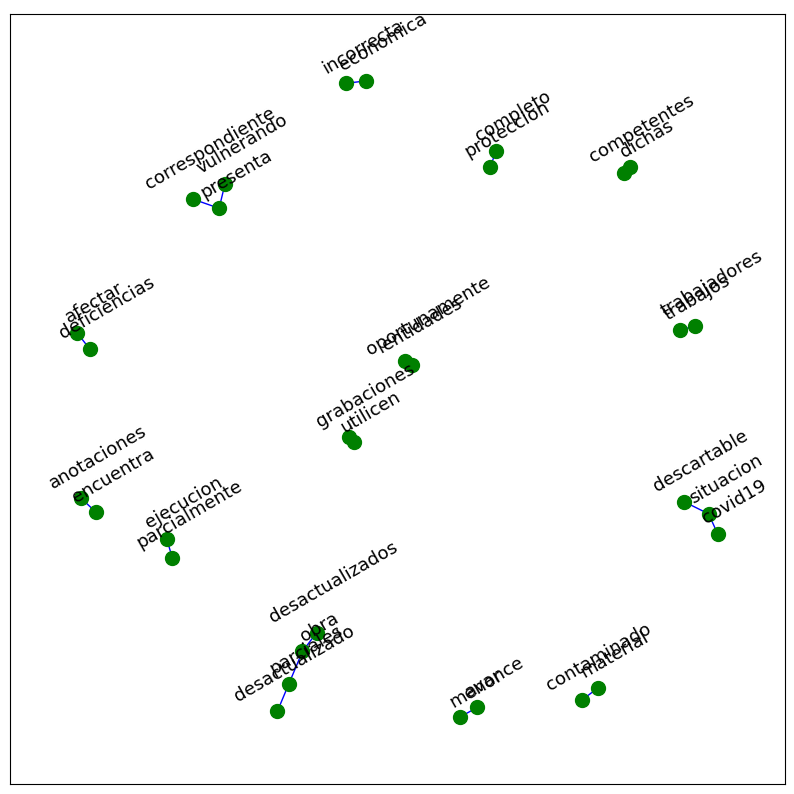

In [107]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(monitor2_x)

# Plot networks
nx.draw_networkx(monitor2_x, pos,
                 edge_color='blue',node_color='green',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center',
            fontsize=13,rotation=30)

plt.show()